In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df = pd.read_csv('processed_data.csv')

Table for Total Crimes As per State

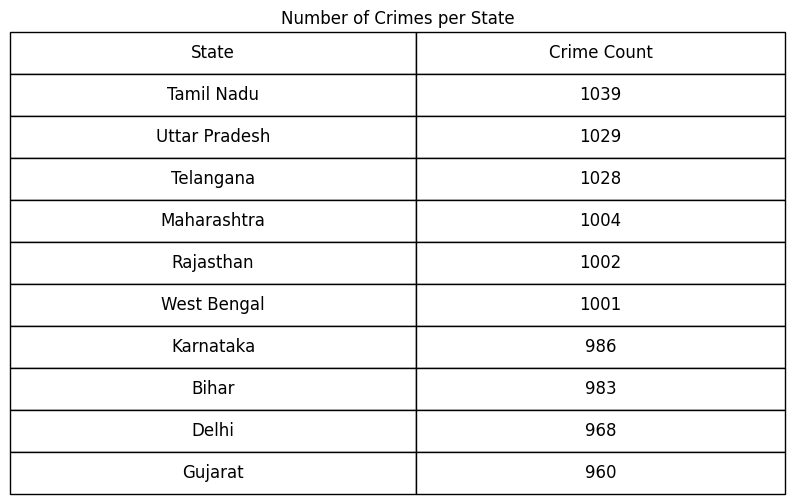

In [2]:
def display_state_crime_table(df):
    # Aggregate the data by state
    state_crime_counts = df.groupby('State').size().reset_index(name='Crime Count')

    # Sort the data for better readability (optional)
    state_crime_counts = state_crime_counts.sort_values(by='Crime Count', ascending=False)

    # Set up the Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed

    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    ax.set_frame_on(False)

    # Create a table
    table = ax.table(cellText=state_crime_counts.values,
                     colLabels=state_crime_counts.columns,
                     cellLoc='center', 
                     loc='center',
                     bbox=[0, 0, 1, 1])  # Adjust the bbox as needed for better fit

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width([0, 1])

    # Add title to the plot
    plt.title('Number of Crimes per State')

    # Show the plot
    plt.show()
    
display_state_crime_table(df)

Table for Total Crimes As per City for the Selected State

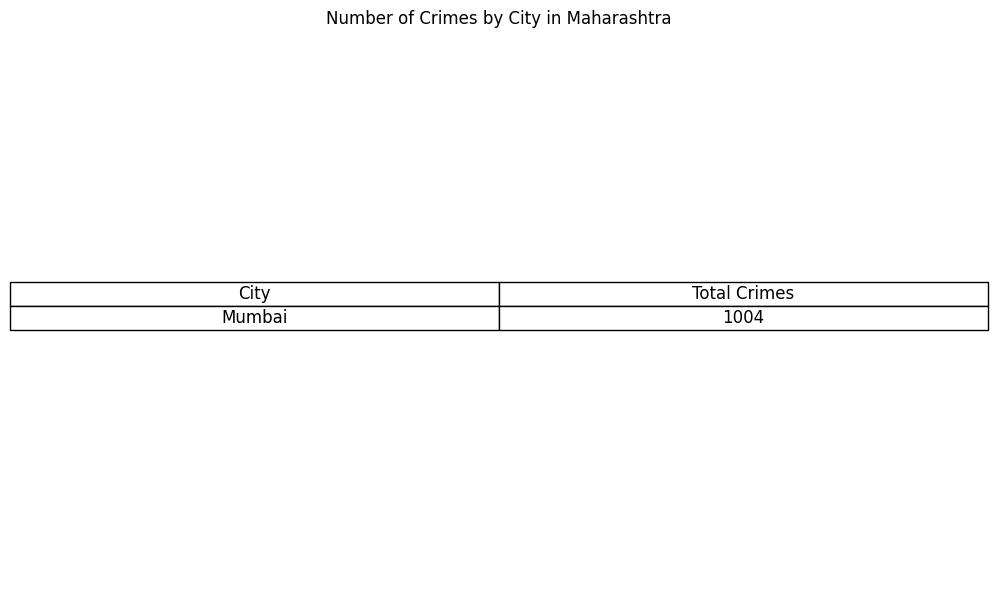

In [3]:
def plot_table(state):
    # Filter data for the selected state
    filtered_df = df[df['State'] == state]

    if filtered_df.empty:
        print(f"No data found for state: {state}")
        return

    # Aggregate data to get total crimes per city
    city_crime_counts = filtered_df.groupby('City').size().reset_index(name='Total Crimes')

    if city_crime_counts.empty:
        print(f"No crime data available for cities in state: {state}")
        return

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Hide the axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    ax.set_frame_on(False)

    # Add table
    table_data = city_crime_counts.values
    column_labels = city_crime_counts.columns
    table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

    # Customize table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)  # Adjust table size

    # Show the table
    plt.title(f'Number of Crimes by City in {state}')
    plt.tight_layout()
    plt.show()

# Example usage
state = 'Maharashtra'  # Change this to your desired state
plot_table(state)

Pie Chart to Show Different Type of Crimes as per City

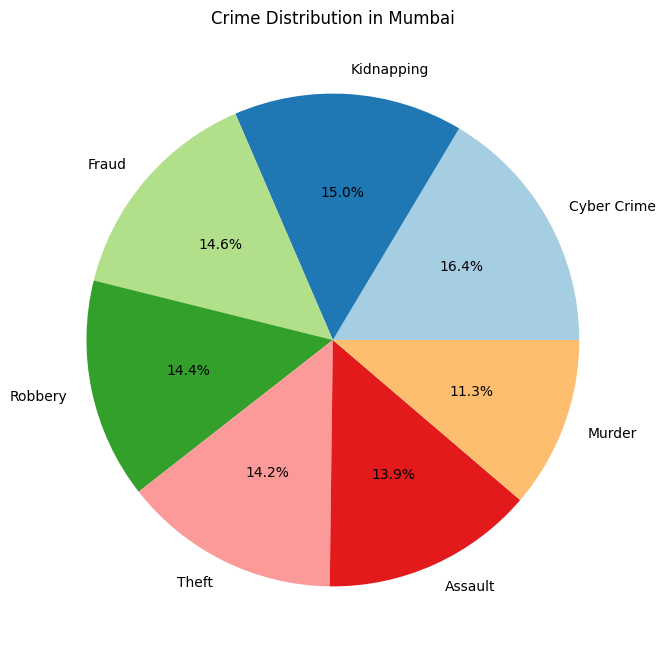

In [4]:
def plot_pie_chart(city):
    # Filter data for the selected city
    filtered_df = df[df['City'] == city]

    if filtered_df.empty:
        print(f"No data found for city: {city}")
        return

    # Aggregate data to get counts of different types of crimes
    crime_type_counts = filtered_df['Crime Type'].value_counts()

    if crime_type_counts.empty:
        print(f"No crime data available for city: {city}")
        return

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(crime_type_counts, labels=crime_type_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(crime_type_counts))))
    plt.title(f'Crime Distribution in {city}')
    plt.show()

# Example usage
city = 'Mumbai'  # Change this to your desired city
plot_pie_chart(city)

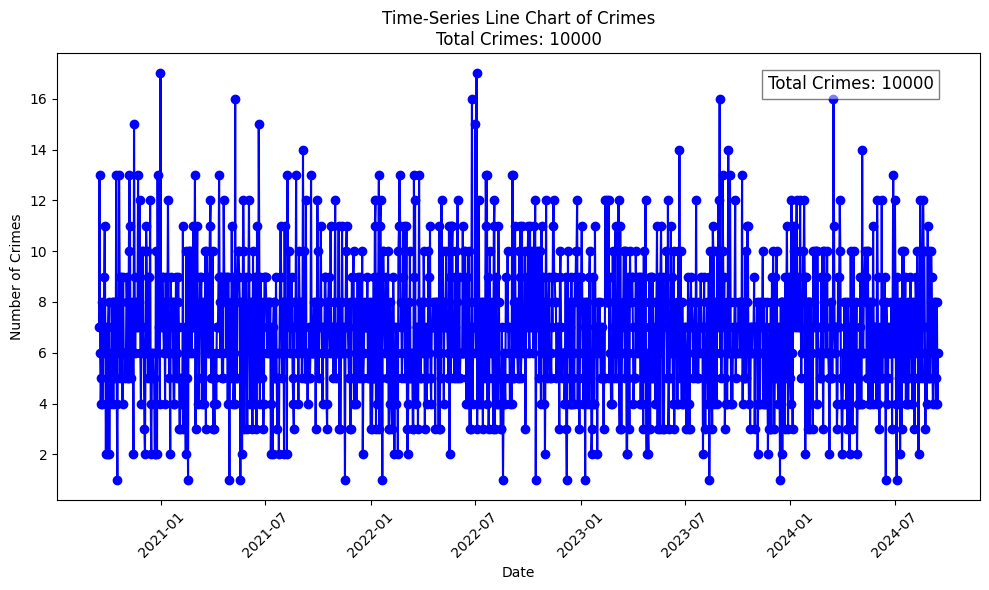

In [5]:
def plot_time_series_with_total(df, date_column):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Aggregate data by date and count occurrences (assuming each row represents a crime)
    time_series_data = df.groupby(date_column).size().reset_index(name='Crime Count')

    # Calculate the total number of crimes
    total_crimes = time_series_data['Crime Count'].sum()

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Plot the line chart
    plt.plot(time_series_data[date_column], time_series_data['Crime Count'], marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.title(f'Time-Series Line Chart of Crimes\nTotal Crimes: {total_crimes}')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout
    plt.tight_layout()

    # Add total crimes as a text label inside the plot (optional)
    plt.text(0.95, 0.95, f'Total Crimes: {total_crimes}', horizontalalignment='right', verticalalignment='top', 
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Show the plot
    plt.show()
    
plot_time_series_with_total(df, 'Date')